## “Using the BI program dataset, how can Walsoft strategically improve student success, optimize resources, and increase the effectiveness of its training program?”

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [79]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

df = pd.read_csv("bi.csv", encoding='latin1')
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [81]:
# check data types 
quantitative = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Quantitative (Numerical) Columns:")
print(quantitative)

qualitative = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nQualitative (Categorical) Columns:")
print(qualitative)

Quantitative (Numerical) Columns:
['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB']

Qualitative (Categorical) Columns:
['fNAME', 'lNAME', 'gender', 'country', 'residence', 'prevEducation']


In [82]:
# Check for any duplicate rows
df.duplicated().sum()

0

In [83]:
# standardize gender
df['gender'] = df['gender'].map({'M': 0, 'Male': 0, 'male':0, 'F': 1, 'Female': 1, 'female':1})
print(df['gender'].value_counts())

# fill null values in Python
df['Python'] = df['Python'].fillna(df['Python'].median())

gender
1    43
0    34
Name: count, dtype: int64


In [84]:
# map to standardize name of country
print("Before:\n", df['country'].unique())
df['country'] = df['country'].replace({
    'USA': 'United States',
    'UK': 'United Kingdom', 
    'UAE': 'United Arab Emirates',
    'Indiaa': 'India',
    'INDIA': 'India',
    'norway': 'Norway',
    'Rsa': 'Russia'
})

print("After:\n", df['country'].unique())
# encode country
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
print(df['country'].value_counts())

Before:
 ['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
After:
 ['Norway' 'Kenya' 'Uganda' 'Russia' 'South Africa' 'Norge' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'United Kingdom' 'Somali' 'Nigeria'
 'Germany' 'France']
country
8     48
13     4
4      3
2      3
0      2
5      2
3      2
12     2
14     2
10     2
6      2
1      2
9      1
11     1
7      1
Name: count, dtype: int64


In [85]:
# map to standardize name of residence
print("Before:\n", df['residence'].unique())
df['residence'] = df['residence'].replace({
    'BI-Residence': 'BI Residence',
    'BIResidence': 'BI Residence',
    'BI_Residence': 'BI Residence',
})

print("After:\n", df['residence'].unique())
# encode residence
le = LabelEncoder()
df['residence'] = le.fit_transform(df['residence'])
print(df['residence'].value_counts())

Before:
 ['Private' 'Sognsvann' 'BI Residence' 'BI-Residence' 'BIResidence'
 'BI_Residence']
After:
 ['Private' 'Sognsvann' 'BI Residence']
residence
1    33
0    32
2    12
Name: count, dtype: int64


In [86]:
# map to standardize name of prevEducation
print("Before:\n", df['prevEducation'].unique())
df['prevEducation'] = df['prevEducation'].replace({
    'HighSchool': 'High School',
    'Barrrchelors': 'Bachelors',
    'Diplomaaa': 'Diploma',
    'diploma': 'Diploma',
    'DIPLOMA': 'Diploma'
})

print("After:\n", df['prevEducation'].unique())
# encode preEducation
le = LabelEncoder()
df['prevEducation'] = le.fit_transform(df['prevEducation'])
print(df['prevEducation'].value_counts())

Before:
 ['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']
After:
 ['Masters' 'Diploma' 'High School' 'Bachelors' 'Doctorate']
prevEducation
0    25
3    19
4    16
1    12
2     5
Name: count, dtype: int64


In [87]:
# summary for numerical columns
df.describe()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,0.558442,7.571429,0.740260,76.753247,1.857143,149.714286,75.987013,69.467532
std,10.341966,0.499829,2.962167,0.714559,16.475784,1.595341,12.743272,15.228517,17.033701
min,21.000000,0.000000,0.000000,0.000000,28.000000,0.000000,114.000000,15.000000,30.000000
25%,27.000000,0.000000,8.000000,0.000000,69.000000,0.000000,144.000000,72.000000,56.000000
50%,33.000000,1.000000,8.000000,1.000000,80.000000,2.000000,156.000000,81.000000,71.000000
75%,42.000000,1.000000,8.000000,1.000000,90.000000,3.000000,158.000000,85.000000,83.000000
max,71.000000,1.000000,14.000000,2.000000,98.000000,4.000000,160.000000,91.000000,100.000000


In [88]:
# summary for categorical columns
df.describe(include='object')

,fNAME,lNAME
count,77,77
unique,71,66
top,Emma,Eliassen
freq,2,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     int64  
 4   country        77 non-null     int32  
 5   residence      77 non-null     int32  
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     int32  
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 5.8+ KB


## Key Strategic Areas

### 1. Admissions Optimization
Should entry exams remain the primary admissions filter?

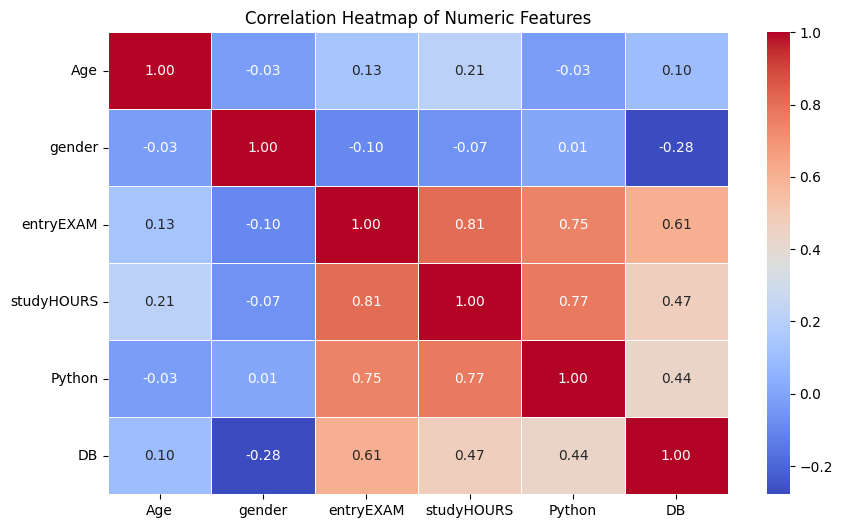

In [90]:
# correlations of entryExam with Python/DB/studyHours
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [91]:
features = ['entryEXAM', 'studyHOURS', 'Age', 'prevEducation']
X = df[features]
y_python = df['Python']
y_db = df['DB']

# Train models
model_python = LinearRegression().fit(X, y_python)
model_db = LinearRegression().fit(X, y_db)

# Extract feature importance
importance_python = pd.Series(model_python.coef_, index=features).sort_values(ascending=False)
importance_db = pd.Series(model_db.coef_, index=features).sort_values(ascending=False)

print("Feature importance for Python:\n", importance_python)
print("\nFeature importance for DB:\n", importance_db)

Feature importance for Python:
 studyHOURS       0.661339
entryEXAM        0.298685
prevEducation    0.129014
Age             -0.271812
dtype: float64

Feature importance for DB:
 entryEXAM        0.691088
prevEducation    0.102083
Age              0.049295
studyHOURS      -0.105664
dtype: float64


- entryExams can remained as primary admissions filter for DB-focused programs because the coefficient is highest among features (0.69)
<br>
- for Python-focused programs, studyHours shows a highest coefficient (0.66) which can introduce a new behavioral and skill-based filters for admissions filter

### 2. Curriculum Support Strategy
Are there at-risk student groups who need extra support?

In [92]:
for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

0 → Bachelors
1 → Diploma
2 → Doctorate
3 → High School
4 → Masters


In [93]:
df.groupby('prevEducation')[['Python', 'DB', 'entryEXAM']].agg(['mean', 'std', 'count'])

Python                          DB                   \
                    mean        std count       mean        std count   
prevEducation                                                           
0              80.000000   6.396614    25  70.880000  16.414729    25   
1              70.083333  20.029335    12  69.000000  18.547237    12   
2              75.600000  25.025986     5  69.800000  18.713631     5   
3              70.157895  19.215917    19  61.421053  17.150691    19   
4              81.187500   8.863549    16  77.062500  13.901888    16   

               entryEXAM                   
                    mean        std count  
prevEducation                              
0              80.640000   9.686245    25  
1              70.166667  18.374059    12  
2              79.600000  27.808272     5  
3              67.947368  15.661253    19  
4              85.187500  15.505778    16

- Group 3, High School students tend to achieve lower score in Python, DB, and entry Exam with the lowest mean Python (70.15), DB (61.42), entryExam (85.18)
<br>
- This group required more support in getting better performance

### 3. Resource Allocation & Program ROI
How can we allocate resources for maximum student success?

In [94]:
features = ['Python', 'DB', 'entryEXAM', 'studyHOURS']
X = df[features]

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
from sklearn.cluster import KMeans

# cluster the performance and effort
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [97]:
df.groupby('cluster')[features].mean()

,Python,DB,entryEXAM,studyHOURS
cluster,,,,
0,82.823529,76.803922,85.941176,156.588235
1,33.666667,53.500000,48.333333,119.000000
2,71.250000,55.550000,61.850000,141.400000


**Cluster 0: Effort-Driven Learners**
<br>
- Moderate scores, especially in DB
<br>
- High study hours suggest strong effort
<br>
- May benefit from targeted skill-building and mentorship
<br>

**Cluster 1: At-Risk Students**
<br>
- Lowest scores across all metrics
<br>
- Lower study hours and exam scores
<br>
- Needs foundational support: prep courses, tutoring, and engagement strategies
<br>

**Cluster 2: High Achievers**
<br>
- Strong scores in Python, DB, and entry exams
<br>
- High study hours confirm disciplined learning
<br>
- Ideal for advanced modules, research opportunities, and leadership roles


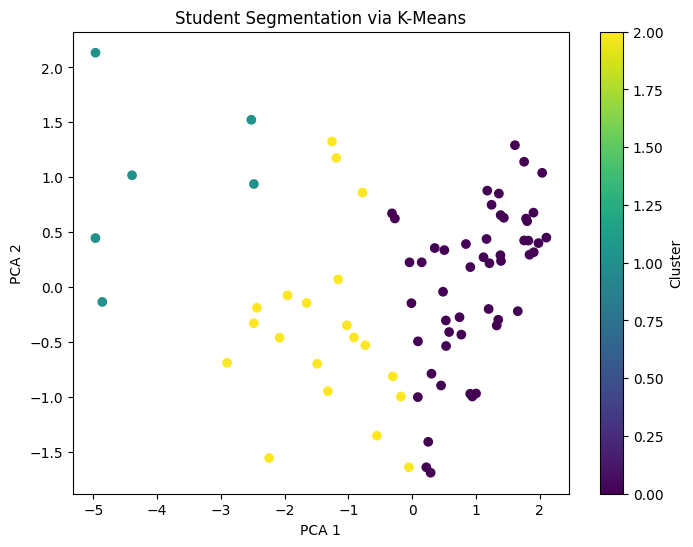

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Student Segmentation via K-Means')
plt.colorbar(label='Cluster')
plt.show()